<a href="https://colab.research.google.com/github/PeddapalliAbhinav/Data_mining/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
california = fetch_california_housing()
data = pd.DataFrame(california.data,columns=california.feature_names)
data['PRICE'] = california.target
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  PRICE
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25  3.422


In [12]:
print(data.isnull().sum())
#define features and target variable
x = data.drop('PRICE',axis=1)
y = data['PRICE']

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [18]:
#split dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71    -117.03
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77    -118.16
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66    -120.48
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69    -117.11
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78    -119.80
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06    -119.01
3024   2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14    -119.46
15663  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80    -122.44
20484  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28    -118.72
9814   3.7250      34.0  5.49299

In [15]:
#train the model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.56
R-squared: 0.58


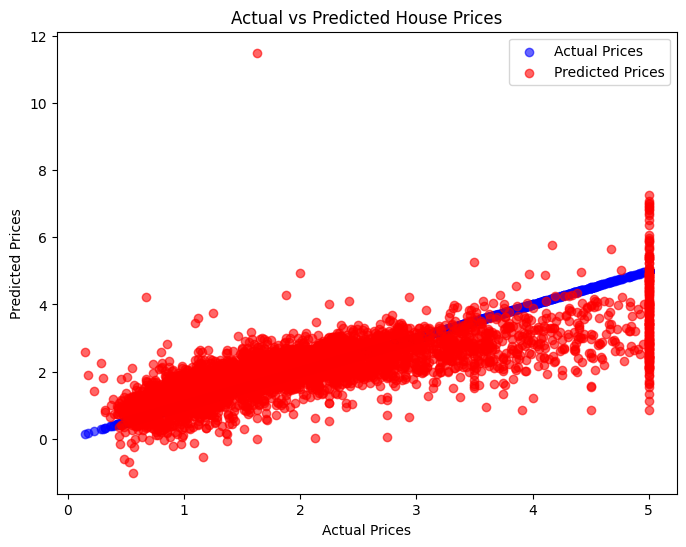

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,color='blue',label='Actual Prices',alpha=0.6)
plt.scatter(y_test,y_pred,color='red',label='Predicted Prices',alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()